In [ ]:
!top -u

In [ ]:
# !pip3 install numpy
# !pip3 install matplotlib

In [ ]:
!cat alattice.txt

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:

dim=4

f=open("alattice.txt",'r')
l=f.readline()
item=l.split(",")
tStepSize,xStepSize,yStepSize,zStepSize = int(item[0]),int(item[1]),int(item[2]),int(item[3])
latticeSize=tStepSize*xStepSize*yStepSize*zStepSize 
print("rStepSize = [ {} , {} , {} ] , tStepSize = {} , latticeSize = {}".format(xStepSize,yStepSize,zStepSize,tStepSize,latticeSize))


lattice=np.ndarray((tStepSize,xStepSize,yStepSize,zStepSize))
print(" reading lattice of shape ",lattice.shape)
l=f.readline()
while l:
    item=l.split(",")
    i,j,k,l,val=int(item[1]),int(item[2]),int(item[3]),int(item[4]),float(item[5])
    lattice[i][j][k][l]=float(val)
    l=f.readline()
    
f.close()    

rStepSize = [ 16 , 16 , 16 ] , tStepSize = 16 , latticeSize = 65536
 reading lattice of shape  (16, 16, 16, 16)


In [ ]:
i,j,k=0,0,0
for i in range(tStepSize):
    for j in range(xStepSize):
        for k in range(xStepSize):
            print(lattice[:,i,j,k])

In [ ]:
sucess=True
totalFails=0
for i in range(tStepSize):
    for j in range(xStepSize):
        for k in range(xStepSize):
            for l in range(xStepSize):
                x=lattice[i][j][k][l]
                if x==lattice[i][j][k][(l+1)%xStepSize]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,k,(l+1)%xStepSize))
                    sucess=False
                    totalFails+=1
                if x==lattice[i][j][k][l-1]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,k,l-1))
                    sucess=False
                    totalFails+=1
                if x==lattice[i][j][(k+1)%xStepSize][l]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,(k+1)%xStepSize,l))
                    sucess=False
                    totalFails+=1
                if x==lattice[i][j][k-1][l]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,k-1,l))
                    sucess=False
                    totalFails+=1
                if x==lattice[i][(j+1)%xStepSize][k][l]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,(j+1)%xStepSize,k,l))
                    sucess=False
                    totalFails+=1
                if x==lattice[i][j-1][k][l]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j-1,k,l))
                    sucess=False
                    totalFails+=1
                if x==lattice[(i+1)%xStepSize][j][k][l]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,(i+1)%xStepSize,j,k,l))
                    sucess=False
                    totalFails+=1
                if x==lattice[(i+1)%xStepSize][j][k][l]:
                    print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i-1,j,k,l))
                    sucess=False
                    totalFails+=1
                
if not sucess:
    print("validation failed to suceed with ",totalFails," mihappenings")
else:
    print("validation sucessfull")
    

In [ ]:
# sucess=True
# totalFails=0
# for i in range(tStepSize):
#     for j in range(xStepSize):
#         for k in range(xStepSize):
#             for l in range(xStepSize):
#                 x=-1*lattice[i][j][k][l]
#                 if x!=lattice[i][j][k][(l+1)%xStepSize]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,k,(l+1)%xStepSize))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[i][j][k][l-1]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,k,l-1))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[i][j][(k+1)%xStepSize][l]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,(k+1)%xStepSize,l))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[i][j][k-1][l]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j,k-1,l))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[i][(j+1)%xStepSize][k][l]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,(j+1)%xStepSize,k,l))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[i][j-1][k][l]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i,j-1,k,l))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[(i+1)%xStepSize][j][k][l]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,(i+1)%xStepSize,j,k,l))
#                     sucess=False
#                     totalFails+=1
#                 if x!=lattice[(i+1)%xStepSize][j][k][l]:
#                     print("{},{},{},{} != {},{},{},{}".format(i,j,k,l,i-1,j,k,l))
#                     sucess=False
#                     totalFails+=1
                
# if not sucess:
#     print("validation failed to suceed with ",totalFails," mihappenings")
# else:
#     print("validation sucessfull")
    

## Phi4 Validation

In [5]:
readNlattices=200
dim=4

f=open("data/lattice8b2_1.txt",'r')
l=f.readline()
item=l.split(",")
tStepSize,xStepSize,yStepSize,zStepSize = int(item[0]),int(item[1]),int(item[2]),int(item[3])
latticeSize=tStepSize*xStepSize*yStepSize*zStepSize 
print("rStepSize = [ {} , {} , {} ] , tStepSize = {} , latticeSize = {}\n".format(xStepSize,yStepSize,zStepSize,tStepSize,latticeSize))


lattice=np.ndarray((readNlattices,tStepSize,xStepSize,yStepSize,zStepSize))
print("lattice allowted  : ",lattice.nbytes/1024/1024," MB")

print(" reading matrix of shape ",lattice.shape)
l=f.readline()
currLattice=-1
skipCount = 0
count=-1
while l:
    if l[0]=='!':
        l=f.readline()
        count+=1
        if(count%50==0):
            print(count)
        if count<skipCount:
            continue
        currLattice+=1
    if currLattice== readNlattices:
        break
    item=l.split(",")
    i,j,k,l,val=int(item[1]),int(item[2]),int(item[3]),int(item[4]),float(item[5])
    lattice[currLattice][i][j][k][l]=float(val)
    l=f.readline()
    
f.close()    


rStepSize = [ 8 , 8 , 8 ] , tStepSize = 8 , latticeSize = 4096

lattice allowted  :  6.25  MB
 reading matrix of shape  (200, 8, 8, 8, 8)
0
50
100
150
200


### Print time and spatial Slices

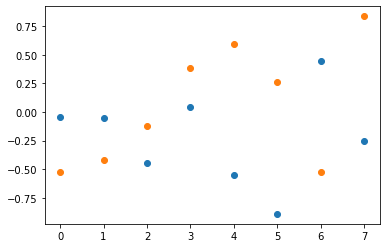

In [6]:
# time slice

stateA_Idx=0
stateB_Idx=4

tSlice_x  = 0
tSlice_y  = 0
tSlice_z  = 0

tSlice = np.arange(0,tStepSize)

plt.scatter(tSlice,lattice[stateA_Idx,:,tSlice_x,tSlice_y,tSlice_z])
plt.scatter(tSlice,lattice[stateB_Idx,:,tSlice_x,tSlice_y,tSlice_z])


In [ ]:
plt.hist(np.ndarray.flatten(abs(lattice)))

In [ ]:
lattice[stateA_Idx,Slice_t,:,:,tSlice_z]

In [ ]:
# time slice

stateA_Idx=0
stateB_Idx=1
stateC_Idx=2
stateD_Idx=3

Slice_t  = 0
Slice_z  = 0

tSlice = np.arange(0,tStepSize)

f,ax=plt.subplots(1,4,figsize=(16,4))
ax[0].matshow(lattice[stateA_Idx,Slice_t,:,:,tSlice_z], vmin=-1, vmax=+1)
ax[1].matshow(lattice[stateB_Idx,Slice_t,:,:,tSlice_z], vmin=-1, vmax=+1)
ax[2].matshow(lattice[stateC_Idx,Slice_t,:,:,tSlice_z], vmin=-1, vmax=+1)
ax[3].matshow(lattice[stateD_Idx,Slice_t,:,:,tSlice_z], vmin=-1, vmax=+1)

## Make images for spatial slice GIF

In [ ]:
np.amax(lattice[i,Slice_t,:,:,tSlice_z])

In [ ]:
Slice_t  = 0
Slice_z  = 0

tSlice = np.arange(0,tStepSize)

f=plt.figure(figsize=(4,4))

ax = plt.gca()
# for i in range(200):
#     ax.matshow(np.abs(lattice[i,Slice_t,:,:,tSlice_z]), vmin=0, vmax=5.0)#np.amax(lattice[i,Slice_t,:,:,tSlice_z]))
#     plt.savefig("gifpics/"+str(i)+"_lattice.png")
    

## Observable Plots

In [ ]:
!ls *.txt

In [ ]:
!ls obs_lattice8bs4_1.txt

In [ ]:
!ls lattice14b2*

In [ ]:
f=open(fname,'r')

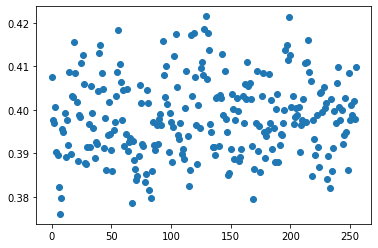

In [20]:
prefix="data/l"
sL=8
bL=2
prefix="data/l"+str(sL)+'b'+str(bL)+'/'
name='lattice'+str(sL)+'b'+str(bL)

# lattice8b2_389.txt
idxs=[ 389]#i+1 for i in range(389) ]

step=[]
energy=[]

for idx in idxs:
    fname=prefix+'obs_'+name+'_'+str(idx)+'.txt'
    if(idx%50==0):
        print(" Reading ",fname)
    f=open(fname,'r')
    l=f.readline()
    item=l[:-1].split(",")
    tStepSize,xStepSize,yStepSize,zStepSize = int(item[0]),int(item[1]),int(item[2]),int(item[3])
    latticeSize=tStepSize*xStepSize*yStepSize*zStepSize 
    l=f.readline()
    numObsevables=int(l[:-1])
    l=f.readline()
    while(l):
        item=l[:-1].split(",")
#         print(l,item)
        pos=int(item[0])
        energy.append(abs(float(item[1])))
        
        l=f.readline()
energy=np.array(energy)   
plt.scatter(np.arange(0,energy.shape[0]),energy)

In [ ]:
energy.shape[0]

### Obtaining the Autocorrelation in the simulated data

In [36]:
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result


Text(0.5, 0, 'Sweep')

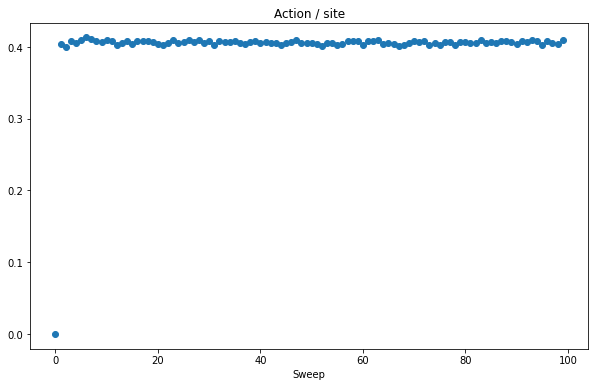

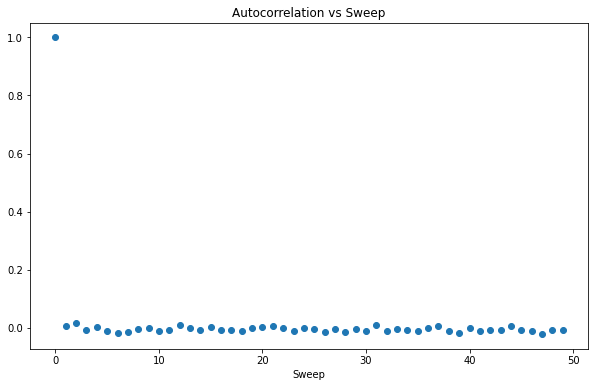

In [124]:
prefix="data/l"
sL=16
bL=2
prefix="data/l"+str(sL)+'b'+str(bL)+'/'
name='lattice'+str(sL)+'s'+str(bL)
plotMax=100
# lattice8b2_389.txt
idxs=[ i+1 for i in range(40) ]

step=[]
energy=[]

for idx in idxs:
    fname=prefix+'obs_'+name+'_'+str(idx)+'.txt'
    if(idx%50==0):
        print(" Reading ",fname)
    f=open(fname,'r')
    l=f.readline()
    item=l[:-1].split(",")
    tStepSize,xStepSize,yStepSize,zStepSize = int(item[0]),int(item[1]),int(item[2]),int(item[3])
    latticeSize=tStepSize*xStepSize*yStepSize*zStepSize 
    l=f.readline()
    numObsevables=int(l[:-1])
    l=f.readline()
    while(l):
        item=l[:-1].split(",")
#         print(l,item)
        pos=int(item[0])
        energy.append(abs(float(item[1])))
        
        l=f.readline()
energy=np.array(energy)[:plotMax]  
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0,energy.shape[0]),energy)
plt.title('Action / site')
plt.xlabel('Sweep')
# plt.savefig('actionthermalization.png')
y=estimated_autocorrelation(energy)[:int(len(energy)/2)]
plt.figure(figsize=(10,6))

y=y[:100]
plt.title('Autocorrelation vs Sweep')
plt.scatter(np.arange(len(y)),y/y[0])
plt.xlabel('Sweep')
# plt.savefig('acf.png')

### Phi4 finding the pole mass

In [39]:
fname='data/l8b2/lattice8b2_389.txt'

In [126]:

prefix="data/l"
sL=14
bL=2
idxs=[ i+1 for i in range(40) ]
readNlattices=8000
prefix="data/l"+str(sL)+'b'+str(bL)+'/'
name='lattice'+str(sL)+'b'+str(bL)


fname=prefix+name+'_'+str(1)+'.txt'
f=open(fname,'r')
l=f.readline()
print(l)
item=l[:-1].split(",")
item=[str(sL),str(sL),str(sL),str(sL)]
tStepSize,xStepSize,yStepSize,zStepSize = int(item[0]),int(item[1]),int(item[2]),int(item[3])
latticeSize=tStepSize*xStepSize*yStepSize*zStepSize 
print("rStepSize = [ {} , {} , {} ] , tStepSize = {} , latticeSize = {}\n".format(xStepSize,yStepSize,zStepSize,tStepSize,latticeSize))
f.close()

lattice=np.ndarray((readNlattices,tStepSize,xStepSize,yStepSize,zStepSize))
print("lattice allowted  : ",lattice.nbytes/1024/1024," MB")

print(" reading matrix of shape ",lattice.shape)
currLattice=-1
skipCount = 0
count=-1
escape=False

for idx in idxs:
    fname=prefix+name+'_'+str(idx)+'.txt'
    if(idx%1==0):
        print(" Reading ",fname)
    f=open(fname,'r')
    l=f.readline()
    l=f.readline()
    while l:
#         print(l)
        if l[0]=='!':
            l=f.readline()
            count+=1
            if(count%10==0):
                print(count)
            if count<skipCount:
                continue
            currLattice+=1
        if currLattice== readNlattices:
            escape=True
            break
        item=l.split(",")
        i,j,k,l,val=int(item[1]),int(item[2]),int(item[3]),int(item[4]),float(item[5])
        lattice[currLattice][i][j][k][l]=float(val)
        l=f.readline()
    if escape:
        break

    f.close()    


14,14,14,14

rStepSize = [ 14 , 14 , 14 ] , tStepSize = 14 , latticeSize = 38416

lattice allowted  :  2344.7265625  MB
 reading matrix of shape  (8000, 14, 14, 14, 14)
 Reading  data/l14b2/lattice14b2_1.txt
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
 Reading  data/l14b2/lattice14b2_2.txt
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
 Reading  data/l14b2/lattice14b2_3.txt
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
 Reading  data/l14b2/lattice14b2_4.txt
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
 Reading  data/l14b2/lattice14b2_5.txt
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
 Reading  data/l14b2/lattice14b2_6.txt
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
141

In [128]:
lattice.shape

(8000, 14, 14, 14, 14)

## Jacknife

In [176]:
def jacknife(A,func,binlen=1):
    c0=func(A)
    sig=0
    for i in range(int(len(A)/binlen)+1):
#         print("doing i= ",i,"/",)
        temp=[A.pop(0) for i in range(binlen)]
        c=func(A)
        sig+=(c-c0)**2
        for i in range(binlen):
            A.append(temp.pop())
    return c0,np.sqrt(sig)


## G(0,t)

In [135]:
n=lattice.shape[1]
idxs=np.arange(n)
shifted_idxs=[]
for i in range(n):
    shifted_idxs.append((idxs+i)%n)
print("n = ",n)

phiZeroPhiT=[]
phi=[]
for i in range(lattice.shape[0]):
    tSlice_avg=np.average(lattice[0],axis=(-3,-2,-1))
    vals=[]
    for j in range(n):
        vals.append(np.average(tSlice_avg*tSlice_avg[shifted_idxs[j]]))
    phiZeroPhiT.append(np.array(vals))
    phi.append(np.array(vals)*0.0+np.average(tSlice_avg))
phiZeroPhiT=np.array(phiZeroPhiT)
phi=np.array(phi)

n =  14


In [137]:
print(phi.shape)
print(phiZeroPhiT.shape)

(8000, 14)
(8000, 14)


In [175]:
G0val[:,0].shape

(8000,)

In [177]:
G0val=phiZeroPhiT-phi
G0t_func=[]
G0t_func_err=[]

for i in range(n):
    val=[x for x in G0val[:,i]]
    g0t,g0t_err=jacknife(val,np.average,10)
    G0t_func.append(g0t)
    G0t_func_err.append(g0t_err)
    print(i," : ",g0t," +/- ",g0t_err)
G0t_func=np.array(G0t_func)
G0t_func_err=np.array(G0t_func_err)

0  :  0.006595950625989133  +/-  2.4548022812551268e-17
1  :  0.006534376163898278  +/-  2.4548022812551268e-17
2  :  0.006516593899767095  +/-  2.4548022812551268e-17
3  :  0.0065481232112438404  +/-  0.0
4  :  0.006528681086933443  +/-  2.4548022812551268e-17
5  :  0.00650302321918944  +/-  2.4548022812551268e-17
6  :  0.006503862245107791  +/-  0.0
7  :  0.0065067750466663845  +/-  2.4548022812551268e-17
8  :  0.006503862245107791  +/-  0.0
9  :  0.00650302321918944  +/-  2.4548022812551268e-17
10  :  0.006528681086933443  +/-  2.4548022812551268e-17
11  :  0.0065481232112438404  +/-  0.0
12  :  0.006516593899767095  +/-  2.4548022812551268e-17
13  :  0.006534376163898278  +/-  2.4548022812551268e-17


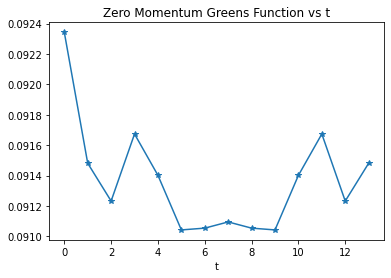

In [191]:
plt.errorbar(np.arange(n),G0t_func*14,G0t_func_err,fmt='-*',barsabove=True,elinewidth=5)
plt.title('Zero Momentum Greens Function vs t')
plt.xlabel('t')
plt.savefig('ZeroPGreenFunc.png')

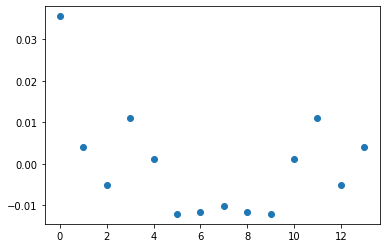

In [179]:
x=np.arange(av.shape[0])
plt.scatter(x,av*8*8*8)

In [183]:
y=np.average(G0val,axis=-2)

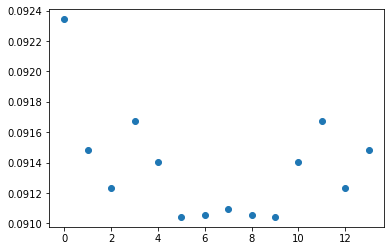

In [184]:
plt.scatter(x,y*14)